<a href="https://colab.research.google.com/github/amitpad/PHYS247/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Dialer Matrix Array
A = np.array([[0,0,0,0,0,0,0,0,1,0],
              [0,0,1,0,1,0,0,0,0,0],
              [0,1,0,1,0,1,0,0,0,0],
              [0,0,1,0,0,0,1,0,0,0],
              [0,1,0,0,0,1,0,1,0,0],
              [0,0,1,0,1,0,1,0,1,0],
              [0,0,0,1,0,1,0,0,0,1],
              [0,0,0,0,1,0,0,0,1,0],
              [1,0,0,0,0,1,0,1,0,1],
              [0,0,0,0,0,0,1,0,1,0]])

In [0]:
AT = np.matrix.transpose(A)
AT

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]])

In [0]:
print("Are Dialer Matrix & its transpose equal ? ", (A == AT).all())

Are Dialer Matrix & its transpose equal ?  True


We could have predicted this result as Dialer Matrix is symmetric. This is because dialer matrix elements represent keys arranged in sequentially left to right & top to bottom. Since they are sequential, during transpose when we flip rows & columns, they remain the same.

In [0]:
def MatrixMulti(P,Q):
  if len(P[0])==len(Q):
    R=[[sum(x*y for x,y in zip(P_row,Q_col)) for Q_col in zip(*Q)] for P_row in P]
    return R
  else: 
    print('Matrix dimensions do not match')

In [0]:
InitialMatrix = np.array([1,1,1,1,1,1,1,1,1,1])
def Dialer_Problem(S,N):
  if (S < 0 or S > 9):
    print("Dial key value should be between 0 and 9")
  else:
    #Creating new variable so as not to modify the original matrix
    MultMatrix = A
    for count in range(1,N-1):
      MultMatrix = np.dot(MultMatrix,A)
    Result = np.dot(MultMatrix,InitialMatrix)
    return Result[S]

In [0]:
print('Verifying the result of Dialer_Problem(5,10) ' , Dialer_Problem(5,10))

Verifying the result of Dialer_Problem(5,10)  18713


In [0]:
A_Nested = [[0,0,0,0,0,0,0,0,1,0],
              [0,0,1,0,1,0,0,0,0,0],
              [0,1,0,1,0,1,0,0,0,0],
              [0,0,1,0,0,0,1,0,0,0],
              [0,1,0,0,0,1,0,1,0,0],
              [0,0,1,0,1,0,1,0,1,0],
              [0,0,0,1,0,1,0,0,0,1],
              [0,0,0,0,1,0,0,0,1,0],
              [1,0,0,0,0,1,0,1,0,1],
              [0,0,0,0,0,0,1,0,1,0]]

In [0]:
InitialList =[[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]]

In [0]:
def Dialer_Problem_Without_Numpy(S,N):
  if (S < 0 or S > 9):
    print("Dial key value should be between 0 and 9")
  else:
    #Creating new variable so as not to modify the original matrix
    MultList = A_Nested
    for count in range(1,N-1):
      MultList = MatrixMulti(MultList,A)
    Result = MatrixMulti(MultList,InitialList)
    return Result[S][0]

In [0]:
print('Verifying the result of Dialer_Problem_Without_Numpy(5,10) ' , Dialer_Problem_Without_Numpy(5,10))

Verifying the result of Dialer_Problem_Without_Numpy(5,10)  18713


In [0]:
import time
def calc_time(S,N):
  t1=time.time()
  Dialer_Problem(S,N)
  return (time.time() - t1) * 1000 #Return in ms

In [0]:
TimeTaken=[]
for count in range(0,1001):
  TimeTaken.append(calc_time(5,count))  #5 is selected as S value since it's median of 0 to 10. Value of S wouldn't make a difference though

No handles with labels found to put in legend.


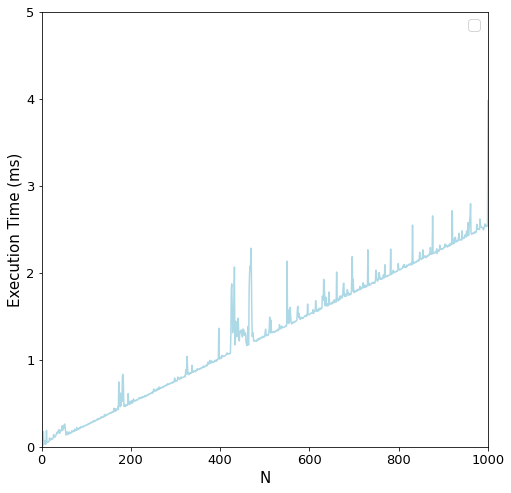

In [0]:
N=range(0,1001)
plt.figure(figsize=(8,8))
plt.plot(N,TimeTaken,c='lightblue')
plt.xlabel('N', fontsize=15)
plt.ylabel('Execution Time (ms)', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim([0, 1000])
plt.ylim([0, 5])

plt.show()